# Google Stocks Prediction With Linear Regression

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Google.csv')

In [4]:
data = pd.read_csv('Google.csv')
data.Date = data['Date'].astype('datetime64[ns]')
data.set_index('Date', inplace=True)

In [5]:
days_gap = 100
test_size = 200

In [6]:
data = data[['Open']]   #Droping rest columns

In [7]:
train_data = data.iloc[:, 0:1][:-test_size].values
test_data = data.iloc[:, 0:1][-test_size:].values

In [8]:
inputs = train_data
x_train, y_train = [], []

for i in range(days_gap, len(train_data)):
    x_train.append(inputs[i-days_gap:i, 0])
    y_train.append(inputs[i,0])

In [9]:
algo = LinearRegression()
algo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
inputs = test_data
x_test, y_test = [], []

for i in range(days_gap, len(test_data)):
    x_test.append(inputs[i-days_gap:i, 0])
    y_test.append(inputs[i,0])    

In [11]:
algo.score(x_test, y_test)

0.8725125439368435

In [12]:
z=algo.predict(x_test)

<IPython.core.display.Javascript object>


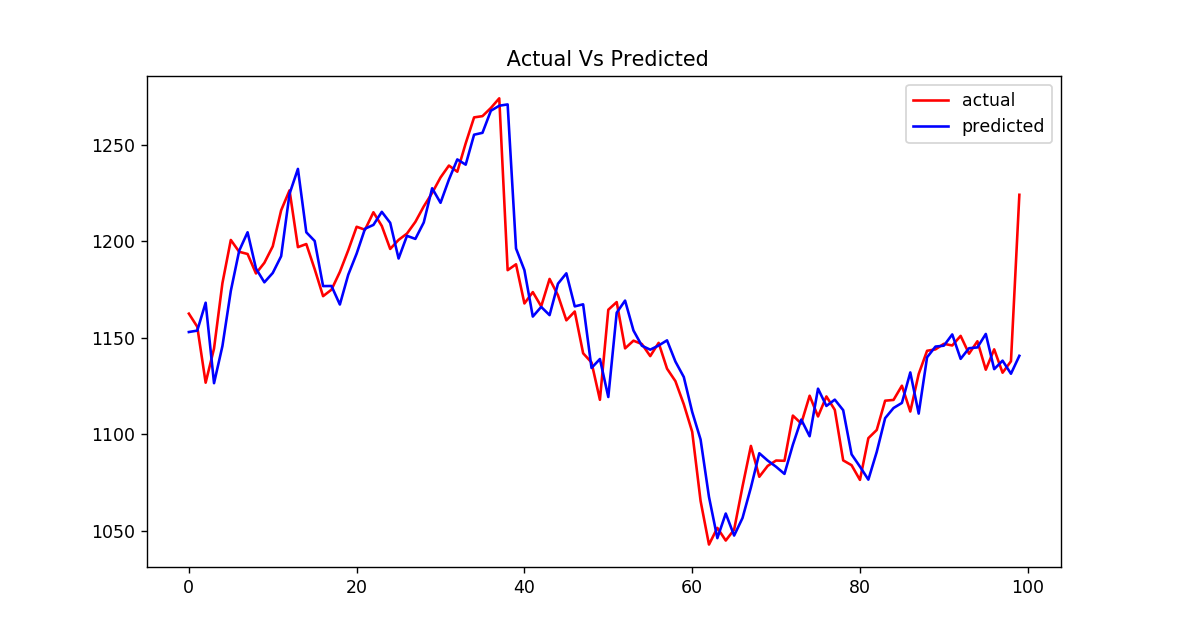

In [14]:
#ploting test result
%matplotlib nbagg
plt.title(" Actual Vs Predicted")
plt.plot(y_test, c='red', label='actual')
plt.plot(z, c='blue', label='predicted')
plt.legend()
plt.show()

In [15]:
for i in range(30):
    df = data.drop(data.index)
    a=data.iloc[:, 0:1][-days_gap:].values
    a=a.reshape(1,-1)
    df.loc[data.iloc[-1].name+timedelta(days=1)] = algo.predict(a)
    data=data.append(df)

<IPython.core.display.Javascript object>


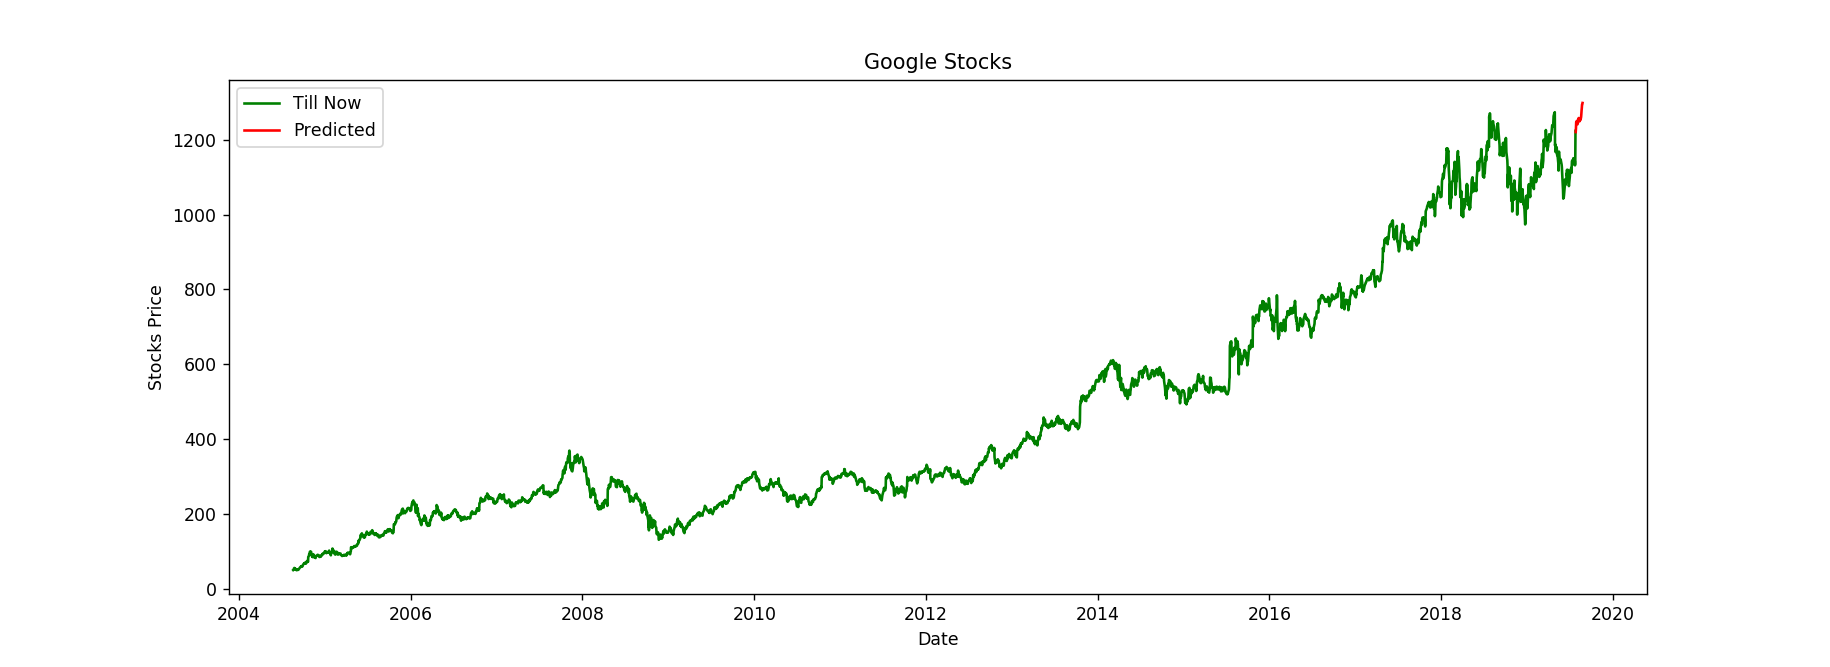

In [17]:
#plotiing prediction
plt.plot(data[:-30], c='g', label='Till Now')
plt.plot(data[-30:], c='r', label='Predicted')
plt.title("Google Stocks")
plt.xlabel('Date')
plt.ylabel('Stocks Price')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


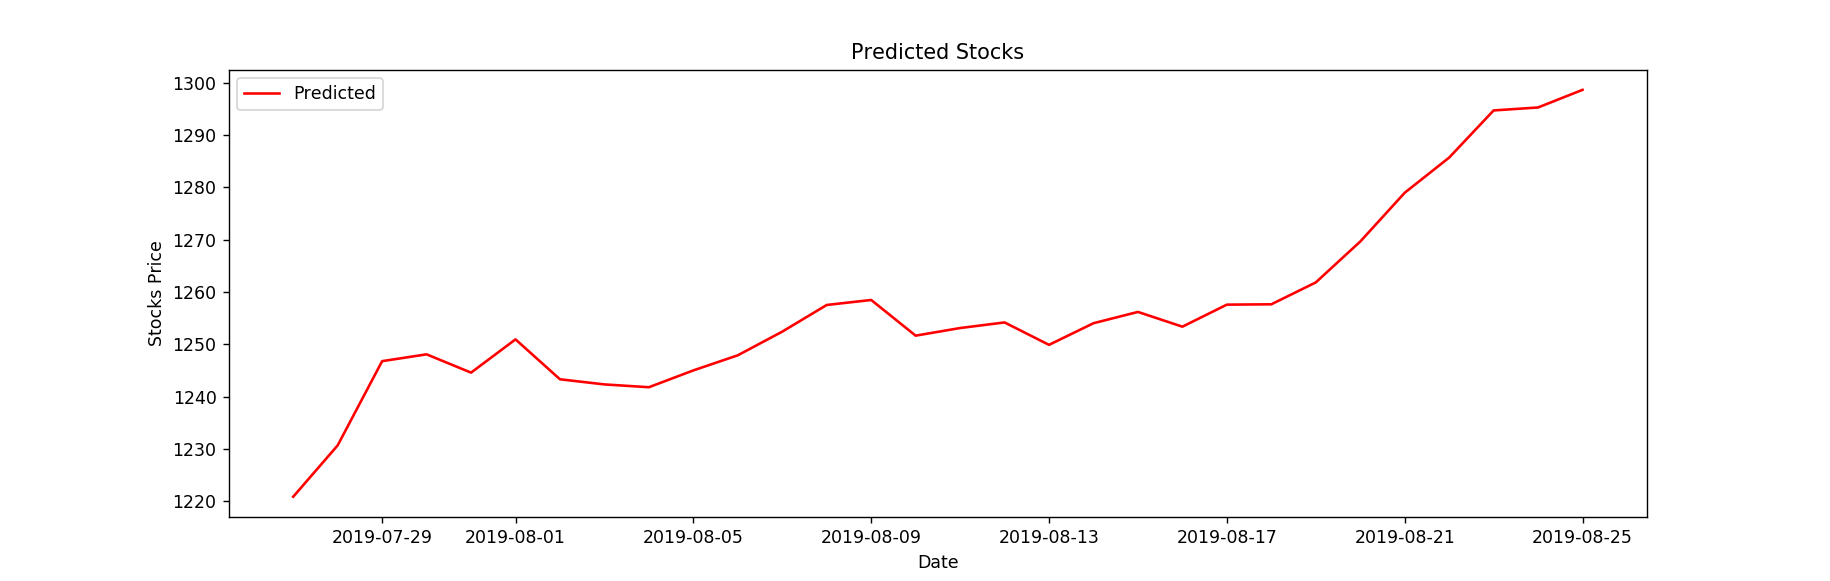

In [19]:
plt.plot(data[-30:], c='r', label='Predicted')
plt.title("Predicted Stocks")
plt.xlabel('Date')
plt.ylabel('Stocks Price')
plt.legend()
plt.show()